In [4]:
#@title
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sys
import pyobis
#import datashader
import geopandas


In [ ]:
dataset_ids = ['c9aaa0e9-8f6c-4553-a014-a857baba0680',
 '2ae2a2bd-8412-405b-8a9f-b71adc41d4c5',
 'a54a77db-7b42-4101-8d71-1adec3dd4ed5',
 '36693923-2abf-4237-8154-8016f32844a0',
 '731e318c-d692-4d6b-b4cc-edff0d385098',
 '230e0287-79c3-47f0-9aed-718b63c0a074',
 'fca3b113-b145-446c-a23c-3188090e43af',
 '52f99f08-fc90-4684-aea8-a015150968ea',
 'fbf4cb59-cef3-43be-b0ab-0dbab5f51740',
 '438b8f02-3421-4b2c-a5b2-5934ab76f47b',
 '62125eda-53d3-41bd-ae1f-1b7e0cda2963',
 '5ef55cd8-05a1-4569-8e17-ceb224e40f59',
 'd32266b4-d98d-4eed-8207-57dff1f14cc4',
 'ab06f0c6-3de3-447a-b339-a8517f2c95ed',
 'cfceb150-bbe2-4efb-8682-14cfc7167e7c',
 'afef5da2-614b-4208-aee6-c2413ed5ab76',
 '62b97724-da17-4ca7-9b26-b2a22aeaab51',
 'fbf4cb59-cef3-43be-b0ab-0dbab5f51740',
 '5ef55cd8-05a1-4569-8e17-ceb224e40f59',
 'cfceb150-bbe2-4efb-8682-14cfc7167e7c',
 'c606c47a-3892-4645-9521-630c9085e59f',
 '2d60dbdc-e801-4c66-991e-d484e8b08227',
 '7eee0f1c-5afc-4135-94df-f3ecb169fa38',
 '69a06619-6cb4-4c8a-8bb2-41f88c5669a1',
 'f42a54d2-4283-47c9-a65b-49b34a34e3c2',
 '6e930622-4421-41f8-b18b-f8d11dd51e15',
 'a2e29f6c-4978-438f-8cc4-f6ea98b34141']

## Categorize the datasets

In this cell, we categorize the datasets which have been submitted into the following bins:

* edna
* remotely-sensed
* images
* acoustics

We categorize the datasets by searching the title of the dataset, as provided in the registration form, for the strings listed above. If the title does not contain those strings, it is assumed to be `in-situ` observations (or a catch all for all other observing methods).

## Use pyobis

https://github.com/iobis/pyobis


In [8]:
from pyobis.occurrences import OccQuery

cumulative_size = 0

combined = pd.DataFrame()

for datasetid in dataset_ids:

  occ = OccQuery()
  dataset = occ.getpoints(datasetid = datasetid)

  df = pd.DataFrame(dataset)

  df['dataset_id'] = row['obis_datasetid']
  df[['decimalLongitude','decimalLatitude']] = pd.DataFrame(df['coordinates'].tolist())

  combined = pd.concat([combined, df],ignore_index=True)

  size = df.shape[0]

  cumulative_size = cumulative_size + size

  print("Found %i unique coordinates." % size)
  print("See in mapper at: %s" % occ.get_mapper_url())

print("\nFound %i total unique coordinates." % cumulative_size )

Found 11 unique coordinates.
See in mapper at: An OBIS mapper URL doesnot exist for this query
Found 67 unique coordinates.
See in mapper at: An OBIS mapper URL doesnot exist for this query
Found 139 unique coordinates.
See in mapper at: An OBIS mapper URL doesnot exist for this query
Found 3 unique coordinates.
See in mapper at: An OBIS mapper URL doesnot exist for this query
Found 19 unique coordinates.
See in mapper at: An OBIS mapper URL doesnot exist for this query
Found 70 unique coordinates.
See in mapper at: An OBIS mapper URL doesnot exist for this query
Found 42 unique coordinates.
See in mapper at: An OBIS mapper URL doesnot exist for this query
Found 139 unique coordinates.
See in mapper at: An OBIS mapper URL doesnot exist for this query
Found 81 unique coordinates.
See in mapper at: An OBIS mapper URL doesnot exist for this query
Found 93 unique coordinates.
See in mapper at: An OBIS mapper URL doesnot exist for this query
Found 1728 unique coordinates.
See in mapper at: 

In [15]:
# from pyobis.occurrences import OccQuery

# cumulative_size = 0

# combined = pd.DataFrame()

# for index, row in df_final.iterrows():

#   datasetid = row['obis_datasetid']

#   occ = OccQuery()
#   dataset = occ.search(datasetid = datasetid)

#   df = pd.DataFrame(dataset)
#   df['category'] = row['Category']

#   combined = pd.concat([combined, df],ignore_index=True)

#   size = df.shape[0]

#   cumulative_size = cumulative_size + size

#   print("Found %i unique coordinates." % size)
#   print("See in mapper at: %s" % occ.get_mapper_url())

# print("\nFound %i total unique coordinates." % cumulative_size )

In [9]:
  # read into geopandas dataframe for plotting
gdf = geopandas.GeoDataFrame(
    combined[['dataset_id','decimalLatitude','decimalLongitude']], 
    geometry=geopandas.points_from_xy(combined.decimalLongitude, combined.decimalLatitude),
    crs = "epsg:4326",
    )

#gdf['dataset_id'] = combined['datasetID']

#gdf['source'] = combined['source']

#gdf['category'] = combined['category']



#location_data = pd.concat([location_data, gdf])

In [10]:
gdf

dataset_id  \
0     d32266b4-d98d-4eed-8207-57dff1f14cc4   
1     d32266b4-d98d-4eed-8207-57dff1f14cc4   
2     d32266b4-d98d-4eed-8207-57dff1f14cc4   
3     d32266b4-d98d-4eed-8207-57dff1f14cc4   
4     d32266b4-d98d-4eed-8207-57dff1f14cc4   
...                                    ...   
6952  a2e29f6c-4978-438f-8cc4-f6ea98b34141   
6953  a2e29f6c-4978-438f-8cc4-f6ea98b34141   
6954  a2e29f6c-4978-438f-8cc4-f6ea98b34141   
6955  a2e29f6c-4978-438f-8cc4-f6ea98b34141   
6956  a2e29f6c-4978-438f-8cc4-f6ea98b34141   

                                                  title category  \
0     nearshore kelp forest integrated fish, 1981-on...  in-situ   
1     nearshore kelp forest integrated fish, 1981-on...  in-situ   
2     nearshore kelp forest integrated fish, 1981-on...  in-situ   
3     nearshore kelp forest integrated fish, 1981-on...  in-situ   
4     nearshore kelp forest integrated fish, 1981-on...  in-situ   
...                                                 ...      ...   
6952                                                     in-situ   
6953                                                     in-situ   
6954                                                     in-situ   
6955                                                     in-situ   
6956                                                     in-situ   

      decimalLatitude  decimalLongitude                     geometry  
0           34.422140       -119.951649  POINT (-119.95165 34.42214)  
1           34.467802       -120.119190  POINT (-120.11919 34.46780)  
2           34.391756       -119.541721  POINT (-119.54172 34.39176)  
3           34.044485       -119.715443  POINT (-119.71544 34.04449)  
4           34.058733       -119.757671  POINT (-119.75767 34.05873)  
...               ...               ...                          ...  
6952        67.536993       -167.542706  POINT (-167.54271 67.53699)  
6953        67.504206       -167.619267  POINT (-167.61927 67.50421)  
6954        67.264051       -168.130817  POINT (-168.13082 67.26405)  
6955        66.504450       -168.402386  POINT (-168.40239 66.50445)  
6956        64.495325       -165.972691  POINT (-165.97269 64.49533)  

[6957 rows x 6 columns]

In [ ]:
# import geopandas as gpd
# import urllib
# import json

# cumulative_size = 0

# base = 'https://api.obis.org/v3/'

# combined_data = gpd.GeoDataFrame()

# location_data = gpd.GeoDataFrame() # initialize df

# # build a list of the subset of fields you want back
# fields = ['dataset_id','datasetID','id','decimalLatitude','decimalLongitude','species','aphiaID','date_year']
# #fields = ['dataset_id','id']

# f = "%2C".join([f"{v}" for v in fields])

# #datasets = df.loc[df['Has the dataset been submitted to OBIS?']=='Yes','If yes to above, please include appropriate OBIS link(s) here.']

# for index, row in df_final.iterrows():

#   gpddf = gpd.GeoDataFrame()

#   datasetid = row['obis_datasetid'] # grab the dataset uuid

#   print("\nDataset ID:",datasetid)
#   print("OBIS Dataset page: https://obis.org/dataset/{}".format(datasetid))

#   url = 'https://api.obis.org/v3/occurrence?datasetid={}'.format(datasetid) # build the API url

#   print("\tAPI request:", url)

#   # find out how many occurrences we expect
#   response = urllib.request.urlopen(url)
#   data_json = json.loads(response.read())
#   size = data_json['total']

#   print("\tFound %i records." % size)

#   cumulative_size = cumulative_size + size

#   # grab the locations
#   url = base + 'occurrence/points?datasetid={}'.format(datasetid)
#   response = urllib.request.urlopen(url)
#   gpddf = gpd.read_file(url)

#   gpddf['dataset_id'] = datasetid
#   gpddf['source'] = row['source']

#   location_data = pd.concat([location_data, gpddf])

# print('Final shape:',location_data.shape)

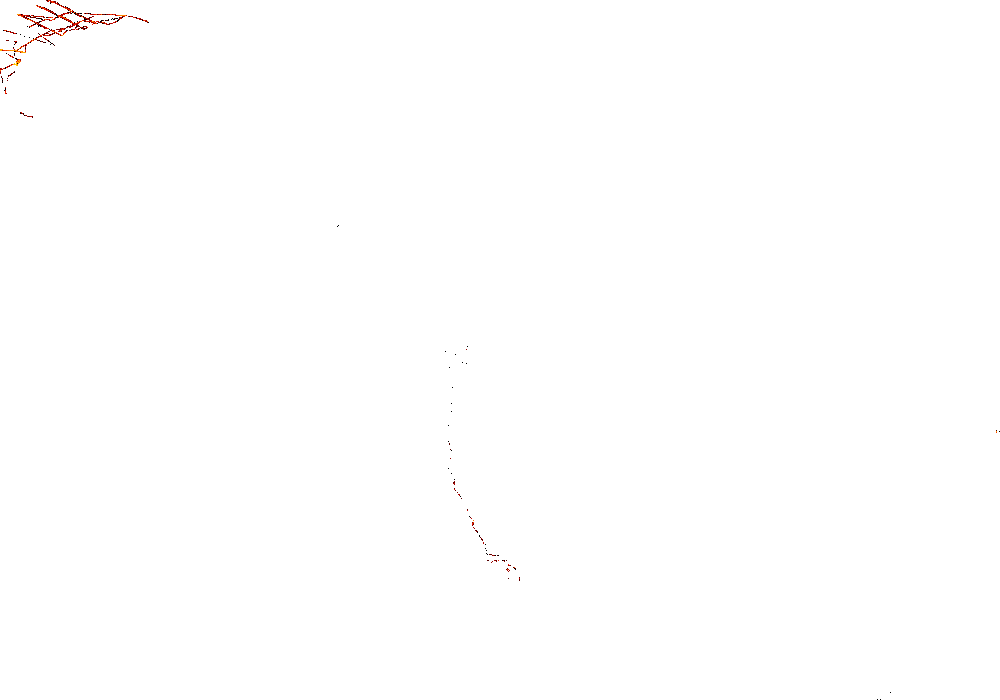

In [11]:
import datashader as ds
import colorcet

cvs = ds.Canvas(plot_width=1000, plot_height=700)
agg = cvs.points(gdf, 'decimalLongitude', 'decimalLatitude')
img = ds.tf.set_background(ds.tf.shade(agg, cmap=colorcet.fire, how='log'), "white")

img

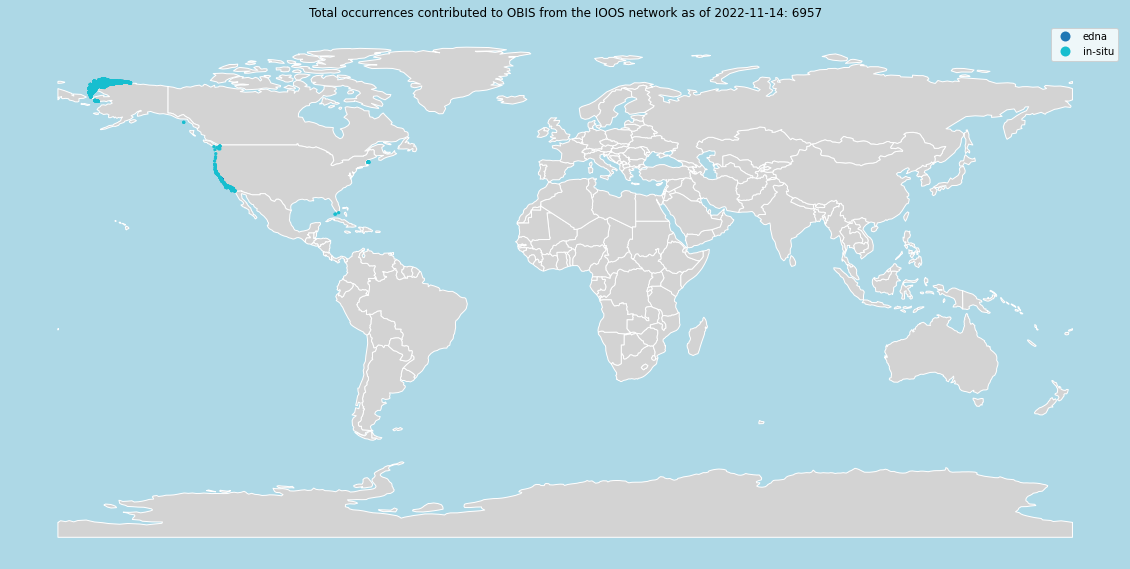

In [12]:
import matplotlib.pyplot as plt
from datetime import datetime

fig, ax = plt.subplots(figsize=(20,10), facecolor='lightblue')


#gdf = gdf.set_crs("epsg:4326")
gdf.plot(ax=ax, markersize=5, column='dataset_id', zorder=10, legend=True)

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

world = world.to_crs(gdf.crs)

world.plot(ax=ax, color='lightgrey', edgecolor='white', zorder=1)

now = datetime.now()

today = now.strftime("%Y-%m-%d")

plt.title("Total occurrences contributed to OBIS from the IOOS network as of %s: %i" % (today, cumulative_size ))

ax.set_axis_off();

plt.show()

In [13]:
!pip install matplotlib mapclassify
!pip install folium -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
gdf.explore(column='category', tooltip=True, popup=True,tiles='CartoDB dark_matter')

In [ ]:
location_data.to_file("ioos_occurrences_obis.geojson", driver='GeoJSON')